In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


In [2]:
print('Current Directory',os.getcwd())

Current Directory C:\Users\Shimul\Documents\Thesis room identification


In [3]:
Directory='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset'
Categories=['building','mosque','temple','tinshed']


In [4]:
os.listdir(Directory)

['test', 'train', 'validation']

In [5]:
for dirname, _, filenames in os.walk(Directory):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(dirname)
        print(filename)

building41.png
building42.png
building43.png
building44.png
building45.png
building46.png
building47.png
building48.png
building49.png
building50.png
building51.png
building52.png
mosque21.png
mosque22.png
mosque23.png
mosque24.png
mosque25.png
mosque26.png
mosque27.png
mosque28.png
mosque29.png
mosque30.png
mosque31.png
mosque32.png
mosque33.png
mosque34.png
mosque35.png
mosque36.png
temple51.png
temple52.png
temple53.png
temple54.png
temple55.png
temple56.png
temple57.png
temple58.png
temple59.png
temple60.png
temple61.png
temple62.png
temple63.png
temple64.png
temple65.png
temple66.png
temple67.png
tinshed16.png
tinshed17.png
tinshed18.png
tinshed19.png
tinshed20.png
tinshed21.png
tinshed22.png
tinshed23.png
tinshed24.png
tinshed25.png
building0.png
building1.png
building10.png
building11.png
building12.png
building13.png
building14.png
building15.png
building16.png
building17.png
building18.png
building19.png
building2.png
building20.png
building21.png
building22.png
building23.png

In [6]:
training_data=[]


In [7]:
train_directory='C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train'

In [8]:
def create_training_data():
    for category in Categories:
        path=os.path.join(train_directory,category)
        print(path)
        class_number=Categories.index(category)
        print(class_number)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
                #print(img_array.shape)
                training_data.append([img_array,class_number])
        
create_training_data()

C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train\building
0
C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train\mosque
1
C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train\temple
2
C:/Users/Shimul/Documents/Thesis room identification/preprocessed_dataset/train\tinshed
3


In [9]:
image_length=len(training_data)
image_length

184

# SVM Classifier in 2D data

In [10]:
x=[]
y=[]

In [11]:
for categories,label in training_data:
    x.append(categories)
    y.append(label)

In [12]:
x[0][0][0],y[0]

(array([92, 79, 60], dtype=uint8), 0)

In [13]:
x=np.array(x).reshape(image_length,-1)


In [14]:
x.shape

(184, 750000)

## Flatten and normalize the data

In [15]:
x=x/255.0


In [16]:
x[0][0]

0.3607843137254902

In [17]:
y=np.array(y)
y.shape

(184,)

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
x_train.shape, y_train.shape

((147, 750000), (147,))

## Fitting with SVM 

In [20]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',gamma='auto')

In [21]:
history=svc.fit(x_train,y_train)

In [22]:
accuracy=svc.score(x_test,y_test)
print('Accuracy of the classifier: ',accuracy*100)

Accuracy of the classifier:  54.054054054054056


## Testing the model

In [23]:
predict_y=svc.predict(x_test)
predict_y

array([0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 3, 1, 2, 2, 2, 0, 2, 0, 2, 0, 3,
       3, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy predicted: ',accuracy_score(y_test,predict_y))

Accuracy predicted:  0.5405405405405406


## classification report

In [25]:
from sklearn.metrics import classification_report
print('Classification report \n',classification_report(y_test,predict_y))

Classification report 
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.33      0.43      0.38         7
           2       0.58      0.54      0.56        13
           3       1.00      1.00      1.00         3

    accuracy                           0.54        37
   macro avg       0.61      0.62      0.61        37
weighted avg       0.55      0.54      0.54        37



In [26]:
import pandas as pd
result=pd.DataFrame({'original':y_test, 'predicted':predict_y})
result

,original,predicted
0,0,0
1,2,2
2,0,0
3,1,0
4,0,0
5,0,1
6,0,0
7,2,0
8,0,1
9,2,2


## Plotting the Graph

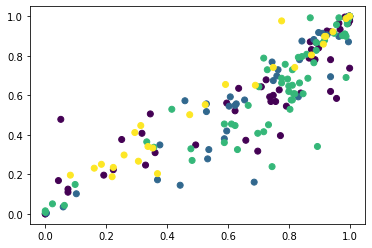

In [27]:
plt.scatter(x[:,0],x[:,1],c=y)

In [28]:
from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(x,y,clf=svc)
#plt.plot(x,y)